In [1]:
import pandas as pd # Library for Dataframes 
import numpy as np # Library for math functions
import pickle # Python object serialization library. Not secure

word_embeddings = pickle.load( open( "word_embeddings_subset.p", "rb" ) )
len(word_embeddings) 

243

In [2]:
countryVector = word_embeddings['country'] # Get the vector representation for the word 'country'
print(type(countryVector)) # Print the type of the vector. Note it is a numpy array
print(countryVector) 

<class 'numpy.ndarray'>
[-0.08007812  0.13378906  0.14355469  0.09472656 -0.04736328 -0.02355957
 -0.00854492 -0.18652344  0.04589844 -0.08154297 -0.03442383 -0.11621094
  0.21777344 -0.10351562 -0.06689453  0.15332031 -0.19335938  0.26367188
 -0.13671875 -0.05566406  0.07470703 -0.00070953  0.09375    -0.14453125
  0.04296875 -0.01916504 -0.22558594 -0.12695312 -0.0168457   0.05224609
  0.0625     -0.1484375  -0.01965332  0.17578125  0.10644531 -0.04760742
 -0.10253906 -0.28515625  0.10351562  0.20800781 -0.07617188 -0.04345703
  0.08642578  0.08740234  0.11767578  0.20996094 -0.07275391  0.1640625
 -0.01135254  0.0025177   0.05810547 -0.03222656  0.06884766  0.046875
  0.10107422  0.02148438 -0.16210938  0.07128906 -0.16210938  0.05981445
  0.05102539 -0.05566406  0.06787109 -0.03759766  0.04345703 -0.03173828
 -0.03417969 -0.01116943  0.06201172 -0.08007812 -0.14941406  0.11914062
  0.02575684  0.00302124  0.04711914 -0.17773438  0.04101562  0.05541992
  0.00598145  0.03027344 -0.07

In [4]:
def vec(w):
    return word_embeddings[w]

Operating on word embeddings

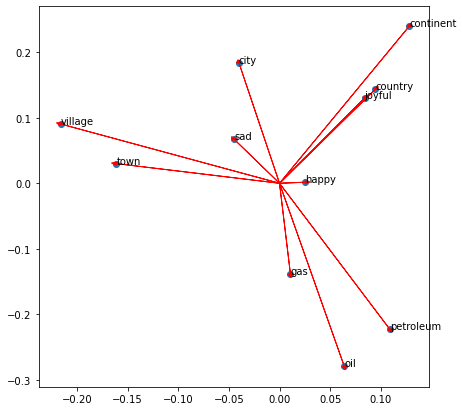

In [6]:
import matplotlib.pyplot as plt 
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
bag2d = np.array([vec(word) for word in words]) 
fig, ax = plt.subplots(figsize = (7, 7))

col1 = 3 
col2 = 2 

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))

plt.show()

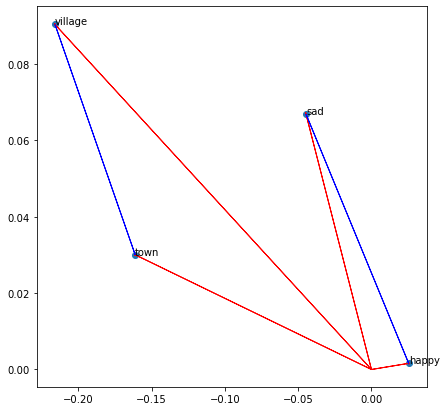

In [7]:
words = ['sad', 'happy', 'town', 'village']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

fig, ax = plt.subplots(figsize = (7, 7)) 

col1 = 3 # Select the column for the x axe
col2 = 2 # Select the column for the y axe

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.0005, head_length=0.0005, fc='r', ec='r', width = 1e-5)
    
# print the vector difference between village and town
village = vec('village')
town = vec('town')
diff = town - village
ax.arrow(village[col1], village[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)

# print the vector difference between village and town
sad = vec('sad')
happy = vec('happy')
diff = happy - sad
ax.arrow(sad[col1], sad[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)
ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))


plt.show()


In [8]:
print(np.linalg.norm(vec('sad')))

2.900484


In [18]:
capital = vec('France') - vec('Paris')
country = vec('Beijing') + capital

print(country[0:5])

[-0.06567383  0.14013672  0.46725464  0.02416992 -0.21020508]


In [10]:
diff = country - vec('Spain')
print(diff[0:10])

[-0.06054688 -0.06494141  0.37643433  0.08129883 -0.13007355 -0.00952148
 -0.03417969 -0.00708008  0.09790039 -0.01867676]


In [11]:
keys = word_embeddings.keys()
data = []
for key in keys:
    data.append(word_embeddings[key])

embedding = pd.DataFrame(data=data, index=keys)
# Define a function to find the closest word to a vector:
def find_closest_word(v, k = 1):
    # Calculate the vector difference from each word to the input vector
    diff = embedding.values - v 
    # Get the norm of each difference vector. 
    # It means the squared euclidean distance from each word to the input vector
    delta = np.sum(diff * diff, axis=1)
    # Find the index of the minimun distance in the array
    i = np.argmin(delta)
    # Return the row name for this item
    return embedding.iloc[i].name

In [13]:
#embedding as a Dataframe
embedding.head(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
country,-0.080078,0.133789,0.143555,0.094727,-0.047363,-0.023560,-0.008545,-0.186523,0.045898,-0.081543,...,-0.145508,0.067383,-0.244141,-0.077148,0.047607,-0.075195,-0.149414,-0.044189,0.097168,0.067383
city,-0.010071,0.057373,0.183594,-0.040039,-0.029785,-0.079102,0.071777,0.013306,-0.143555,0.011292,...,0.024292,-0.168945,-0.062988,0.117188,-0.020508,0.030273,-0.247070,-0.122559,0.076172,-0.234375
China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,0.034424,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,0.200195,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
oil,-0.139648,0.062256,-0.279297,0.063965,0.044434,-0.154297,-0.184570,-0.498047,0.047363,0.110840,...,-0.195312,-0.345703,0.217773,-0.091797,0.051025,0.061279,0.194336,0.204102,0.235352,-0.051025


In [19]:
find_closest_word(country)

'China'

In [20]:
doc = "Spain petroleum city king"
vdoc = [vec(x) for x in doc.split(" ")]
doc2vec = np.sum(vdoc, axis = 0)
doc2vec

array([ 2.87475586e-02,  1.03759766e-01,  1.32629395e-01,  3.33007812e-01,
       -2.61230469e-02, -5.95703125e-01, -1.25976562e-01, -1.01306152e+00,
       -2.18544006e-01,  6.60705566e-01, -2.58300781e-01, -2.09960938e-02,
       -7.71484375e-02, -3.07128906e-01, -5.94726562e-01,  2.00561523e-01,
       -1.04980469e-02, -1.10748291e-01,  4.82177734e-02,  6.38977051e-01,
        2.36083984e-01, -2.69775391e-01,  3.90625000e-02,  4.16503906e-01,
        2.83416748e-01, -7.25097656e-02, -3.12988281e-01,  1.05712891e-01,
        3.22265625e-02,  2.38403320e-01,  3.88183594e-01, -7.51953125e-02,
       -1.26281738e-01,  6.60644531e-01, -7.89794922e-01, -7.04345703e-02,
       -1.14379883e-01, -4.78515625e-02,  4.76318359e-01,  5.31127930e-01,
        8.10546875e-02, -1.17553711e-01,  1.02050781e+00,  5.59814453e-01,
       -1.17187500e-01,  1.21826172e-01, -5.51574707e-01,  1.44531250e-01,
       -7.66113281e-01,  5.36102295e-01, -2.80029297e-01,  3.85986328e-01,
       -2.39135742e-01, -

In [21]:
find_closest_word(doc2vec)

'petroleum'